## CytOpt on the HIPC Data

In this notebook, we apply our method ${\tt CytOpt}$ on various datasets of the HIPC panel. From our numerical experiments, the computation time to get an estimate of the class proportions with the descent-ascent procedure is between 10 and 20 minutes. With the minmax swapping procedure, this computation time is between 1 and 3 minutes.

##### How to try ${\tt CytOpt}$ on other HIPC data sets.

An HIPC data set has the following structure :

xx_y_values : Cytometry measurements 

xx_y_clust : Corresponding manual clustering

xx labels the center where the data analysis was performed.
-replace xx by W2 for Stanford .
-replace xx by D54 for NHLBI.
-replace xx by FTV for Yale.
-replace xx by IU for UCLA.
-replace xx by O0 for CIMR.
-replace xx by pw for Baylor.
-replace xx by pM for Miami.

y labels the patient and the replicate of the biological sample.
-replace y by 1 for patient 1 replicate A (except for Baylor this replicate is not available).
-replace y by 2 for patient 1 replicate B.
-replace y by 3 for patient 1 replicate C.
-replace y by 4 for patient 2 replicate A.
-replace y by 5 for patient 2 replicate B.
-replace y by 6 for patient 2 replicate C.
-replace y by 7 for patient 3 replicate A.
-replace y by 8 for patient 3 replicate B.
-replace y by 9 for patient 3 replicate C.


##### import modules and functions

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import sys
sys.path.append("../Functions")
from Tools_CytOpt_Descent_Ascent import *
from Tools_CytOpt_MinMax_Swapping import *

In [30]:
#Setting of the seed.
np.random.seed(2)

In [31]:
sns.set()

##### import data

In [32]:
#Source Data

Stanford1A_values = pd.read_csv('../Data/W2_1_values.csv',
                                 usecols = np.arange(1,8))
Stanford1A_clust = pd.read_csv('../Data/W2_1_clust.csv',
                                usecols = [1])

#Target Data

Stanford3C_values = pd.read_csv('../Data/W2_9_values.csv',
                                 usecols = np.arange(1,8))
Stanford3C_clust = pd.read_csv('../Data/W2_9_clust.csv',
                                usecols = [1])


Miami3A_values = pd.read_csv('../Data/pM_7_values.csv', 
                             usecols = np.arange(1,8))
Miami3A_clust = pd.read_csv('../Data/pM_7_clust.csv',
                            usecols = [1])


Ucla2B_values = pd.read_csv('../Data/IU_5_values.csv',
                            usecols = np.arange(1,8))
Ucla2B_clust = pd.read_csv('../Data/IU_5_clust.csv',
                           usecols = [1])

Preprocessing of the source data

In [33]:
X_source = np.asarray(Stanford1A_values)
X_source = X_source * (X_source > 0)
scaler = MinMaxScaler()
X_source = scaler.fit_transform(X_source)
Lab_source = np.asarray(Stanford1A_clust['x'])

#### Target data : Stanford3C

Preprocessing of the target data

In [34]:
X_target = np.asarray(Stanford3C_values)
X_target = X_target * (X_target > 0)
X_target = scaler.fit_transform(X_target)
Lab_target = np.asarray(Stanford3C_clust['x'])

Computation of the benchmark class proportions

In [35]:
h_true = np.zeros(10)
for k in range(10):
    h_true[k] = np.sum(Lab_target == k+1)/len(Lab_target)

##### Descent-ascent procedure

Setting of the parameters for the descent-ascent procedure.

In [36]:
n_it_grad = 5000
n_it_sto = 10
pas_grad = 10
eps=0.0001

In [37]:
t0 = time.time()
h_hat1 = cytopt_desasc(X_s=X_source, X_t=X_target, Lab_source=Lab_source, eps=eps, n_out=n_it_grad,
                     n_stoc=n_it_sto, step_grad=pas_grad)[0]

elapsed_time = time.time() - t0


 Epsilon:  0.0001
Iteration  0  - Curent h_hat: 
 [0.10036233 0.10039949 0.10029111 0.10036978 0.10004968 0.09727989
 0.10057368 0.10038044 0.10030082 0.09999277]
Iteration  100  - Curent h_hat: 
 [0.10915155 0.11186741 0.10501314 0.10849145 0.08652589 0.04324883
 0.12154116 0.11470378 0.11347412 0.08598268]
Iteration  200  - Curent h_hat: 
 [0.1108255  0.11653206 0.10314696 0.10823278 0.07531843 0.03219294
 0.1370936  0.12229659 0.11911388 0.07524726]
Iteration  300  - Curent h_hat: 
 [0.11051475 0.11862141 0.09838723 0.10602466 0.06744356 0.02594371
 0.15244185 0.12889805 0.12510564 0.06661915]
Iteration  400  - Curent h_hat: 
 [0.10872044 0.11884669 0.09341673 0.1034649  0.0607415  0.02253066
 0.17000179 0.13433666 0.12698416 0.06095647]
Iteration  500  - Curent h_hat: 
 [0.10672836 0.11905518 0.09005983 0.10029001 0.05595705 0.02039741
 0.1870269  0.13990589 0.12519447 0.05538489]
Iteration  600  - Curent h_hat: 
 [0.10420683 0.11771987 0.08711926 0.09740761 0.05124748 0.01851258


In [38]:
print('Elapsed_time :', elapsed_time/60, 'mins')

Elapsed_time : 2.3069684147834777 mins


##### Minmax swapping procedure

parameters setting for the second procedure

In [39]:
eps = 0.0001
lbd = 0.0001
n_iter = 10000
step_grad = 5
power = 0.99

In [40]:
t0 = time.time()
results = cytopt_minmax(X_source, X_target, Lab_source, eps=eps, lbd=lbd, n_iter=n_iter,
                  step=step_grad, power=power, theta_true=0, monitoring=False)
elapsed_time = time.time() - t0

In [41]:
print('Elapsed time : ',elapsed_time/60, 'Mins')

Elapsed time :  0.3884031057357788 Mins


In [42]:
h_hat2 = results[0]

##### Results

In [43]:
Proportion = np.hstack((h_hat1, h_hat2, h_true))
Classes = np.tile(np.arange(1,11),3)
Methode = np.repeat(['CytOpt_DesAsc', 'CytOpt_Minmax', 'Manual'], 10)
df_res1 = pd.DataFrame({'Proportions':Proportion, 'Classes':Classes, 'Methode':Methode})

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

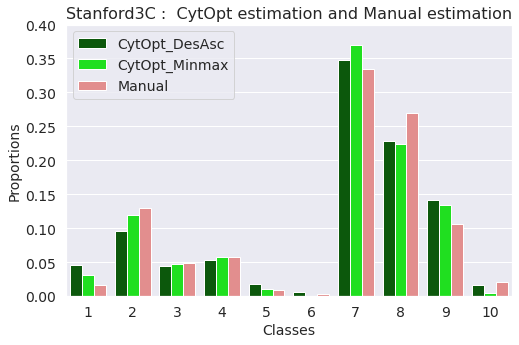

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Classes', y='Proportions', hue='Methode', data=df_res1,
           palette=['darkgreen', 'lime', 'lightcoral'])
plt.title('Stanford3C :  CytOpt estimation and Manual estimation', size=16)
plt.legend(loc = 'upper left', fontsize=14)
plt.xlabel('Classes', size=14)
plt.ylabel('Proportions', size=14)
plt.ylim(0,0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Barplot_Stan3C_prepocessing.eps', format='eps')

#### Target Data : Miami3A

In [45]:
X_target = np.asarray(Miami3A_values)
X_target = X_target * (X_target > 0)
X_target = scaler.fit_transform(X_target)
Lab_target = np.asarray(Miami3A_clust['x'])

Computation of the benchmark class proportions

In [46]:
h_true = np.zeros(10)
for k in range(10):
    h_true[k] = np.sum(Lab_target == k+1)/len(Lab_target)

##### Descent-ascent procedure

In [47]:
t0 = time.time()
h_hat1 = cytopt_desasc(X_s=X_source, X_t=X_target, Lab_source=Lab_source, eps=eps, n_out=n_it_grad,
                     n_stoc=n_it_sto, step_grad=pas_grad)[0]
elapsed_time = time.time() - t0


 Epsilon:  0.0001
Iteration  0  - Curent h_hat: 
 [0.10034342 0.10038997 0.10034505 0.10029524 0.10003083 0.09726156
 0.10038609 0.10041905 0.10055485 0.09997393]
Iteration  100  - Curent h_hat: 
 [0.10821326 0.11087159 0.11018662 0.10583826 0.08978991 0.03809828
 0.11660131 0.11853913 0.11089828 0.09096337]
Iteration  200  - Curent h_hat: 
 [0.10912313 0.11454477 0.11220826 0.10367729 0.07810405 0.02784179
 0.12681169 0.13187966 0.11369425 0.08211511]
Iteration  300  - Curent h_hat: 
 [0.1081049  0.11625605 0.11146555 0.10079088 0.07027149 0.02282162
 0.1365782  0.14463974 0.11493887 0.07413271]
Iteration  400  - Curent h_hat: 
 [0.10596231 0.11640047 0.11147426 0.09706003 0.06443226 0.01965002
 0.14543851 0.15834743 0.11375001 0.06748473]
Iteration  500  - Curent h_hat: 
 [0.10307174 0.11609347 0.10992841 0.09286801 0.05915945 0.01742437
 0.15315049 0.17016833 0.1126272  0.06550853]
Iteration  600  - Curent h_hat: 
 [0.09996584 0.11490793 0.10948589 0.08843807 0.05531469 0.01568024


In [48]:
print('Elapsed_time :', elapsed_time/60, 'mins')

Elapsed_time : 2.4264670332272846 mins


##### Minmax swapping procedure

In [49]:
t0 = time.time()
results = cytopt_minmax(X_source, X_target, Lab_source, eps=eps, lbd=lbd, n_iter=n_iter,
                  step=step_grad, power=power, theta_true=0, monitoring=False)
elapsed_time = time.time() - t0

In [50]:
print('Elapsed time : ',elapsed_time/60, 'Mins')

Elapsed time :  0.47154699166615804 Mins


In [51]:
h_hat2 = results[0]

##### Results

In [52]:
Proportion = np.hstack((h_hat1, h_hat2, h_true))
Classes = np.tile(np.arange(1,11),3)
Methode = np.repeat(['CytOpt_DesAsc', 'CytOpt_Minmax', 'Manual'], 10)
df_res1 = pd.DataFrame({'Proportions':Proportion, 'Classes':Classes, 'Methode':Methode})

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

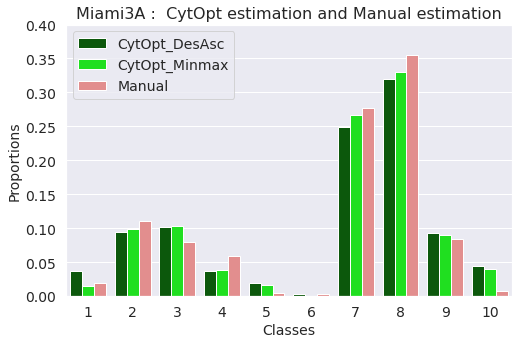

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(x='Classes', y='Proportions', hue='Methode', data=df_res1,
           palette=['darkgreen', 'lime', 'lightcoral'])
plt.title('Miami3A :  CytOpt estimation and Manual estimation', size=16)
plt.legend(loc = 'upper left', fontsize=14)
plt.xlabel('Classes', size=14)
plt.ylabel('Proportions', size=14)
plt.ylim(0,0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Barplot_Stan3C_prepocessing.eps', format='eps')

##### Target data : UCLA2B

In [54]:
X_target = np.asarray(Ucla2B_values)
X_target = X_target * (X_target > 0)
X_target = scaler.fit_transform(X_target)
Lab_target = np.asarray(Ucla2B_clust['x'])

Computation of the benchmark class proportions

In [55]:
h_true = np.zeros(10)
for k in range(10):
    h_true[k] = np.sum(Lab_target == k+1)/len(Lab_target)

##### Descent-ascent procedure

In [56]:
t0 = time.time()
h_hat1 = cytopt_desasc(X_s=X_source, X_t=X_target, Lab_source=Lab_source, eps=eps, n_out=n_it_grad,
                     n_stoc=n_it_sto, step_grad=pas_grad)[0]
elapsed_time = time.time() - t0


 Epsilon:  0.0001
Iteration  0  - Curent h_hat: 
 [0.10031049 0.10032641 0.1002181  0.10039119 0.10019939 0.09720907
 0.10035887 0.10030533 0.10030563 0.10037552]
Iteration  100  - Curent h_hat: 
 [0.11006188 0.11384786 0.10465016 0.10909889 0.09038128 0.04169976
 0.11241885 0.11409718 0.11737193 0.08637222]
Iteration  200  - Curent h_hat: 
 [0.11276097 0.11944188 0.10295907 0.11227664 0.07991729 0.03251811
 0.11769083 0.1214456  0.1243302  0.07665943]
Iteration  300  - Curent h_hat: 
 [0.11478359 0.12401585 0.09989725 0.11257613 0.07177955 0.02786145
 0.12212284 0.12718685 0.13132442 0.06845208]
Iteration  400  - Curent h_hat: 
 [0.11528338 0.1283724  0.09761783 0.11121677 0.06645044 0.02357961
 0.12525178 0.13259741 0.13786155 0.06176884]
Iteration  500  - Curent h_hat: 
 [0.11547796 0.13179743 0.0942961  0.11074422 0.06191866 0.02084563
 0.1282598  0.13551673 0.14409738 0.05704609]
Iteration  600  - Curent h_hat: 
 [0.11557562 0.13539155 0.09081722 0.11087908 0.05868727 0.01970081


In [57]:
print('Elapsed_time :', elapsed_time/60, 'mins')

Elapsed_time : 2.65447868903478 mins


##### Minmax swapping procedure

In [58]:
t0 = time.time()
results = cytopt_minmax(X_source, X_target, Lab_source, eps=eps, lbd=lbd, n_iter=n_iter,
                  step=step_grad, power=power, theta_true=0, monitoring=False)
elapsed_time = time.time() - t0

In [59]:
print('Elapsed time : ',elapsed_time/60, 'Mins')

Elapsed time :  0.42825353145599365 Mins


In [60]:
h_hat2 = results[0]

##### Results

In [61]:
Proportion = np.hstack((h_hat1, h_hat2, h_true))
Classes = np.tile(np.arange(1,11),3)
Methode = np.repeat(['CytOpt_DesAsc', 'CytOpt_Minmax', 'Manual'], 10)
df_res1 = pd.DataFrame({'Proportions':Proportion, 'Classes':Classes, 'Methode':Methode})

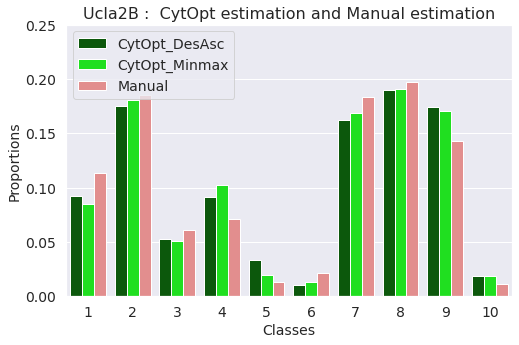

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(x='Classes', y='Proportions', hue='Methode', data=df_res1,
           palette=['darkgreen', 'lime', 'lightcoral'])
plt.title('Ucla2B :  CytOpt estimation and Manual estimation', size=16)
plt.legend(loc = 'upper left', fontsize=14)
plt.xlabel('Classes', size=14)
plt.ylabel('Proportions', size=14)
plt.ylim(0,0.25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);